<a href="https://colab.research.google.com/github/nisafatina/KEL-5-EDM-G5/blob/main/EDM_CHALLENGE_KELOMPOK_KANCIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library yang digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Read Data yang digunakan

In [ ]:
df_keluhan = pd.read_csv("data_keluhan.csv")
df_stunting = pd.read_csv("data_stunting.csv")
df_penduduk = pd.read_csv("data_penduduk.csv")

In [ ]:
df_keluhan.head(40)

,Provinsi,Angka_Keluhan
0,ACEH,32.91
1,SUMATERA UTARA,30.01
2,SUMATERA BARAT,28.12
3,RIAU,27.07
4,JAMBI,25.87
5,SUMATERA SELATAN,32.30
6,BENGKULU,26.66
7,LAMPUNG,32.52
8,KEP. BANGKA BELITUNG,35.11
9,KEP. RIAU,18.41


In [ ]:
df_stunting.head(40)

,Provinsi,Jumlah_Balita,Angka_Stunting(Total),Stunting_Pendek,Stunting_Sangat_Pendek
0,ACEH,"415,223","33,235","24,944","8,291"
1,SUMATERA UTARA,"885,988","48,822","32,089","16,733"
2,SUMATERA BARAT,"348,522","35,958","27,846","8,112"
3,RIAU,"418,300","17,432","13,280","4,152"
4,JAMBI,"239,147","9,714","6,836","2,878"
5,SUMATERA SELATAN,"590,994","18,344","13,655","4,689"
6,BENGKULU,"116,001","5,602","4,656",946
7,LAMPUNG,"520,923","23,550","18,609","4,941"
8,KEPULAUAN BANGKA BELITUNG,"104,378","4,077","3,214",863
9,KEPULAUAN RIAU,"110,753","5,396","4,112","1,284"


In [ ]:
df_penduduk.head(40)

,Provinsi,Jumlah_Penduduk
0,ACEH,540920
1,SUMATERA UTARA,1518050
2,SUMATERA BARAT,567760
3,RIAU,655580
4,JAMBI,363320
5,SUMATERA SELATAN,864730
6,BENGKULU,205940
7,LAMPUNG,449660
8,KEPULAUAN BANGKA BELITUNG,149200
9,KEPULAUAN RIAU,212150


Menggabungkan ketiga data yang dipakai

In [ ]:
merged_df = pd.merge(df_keluhan, df_stunting, on='Provinsi', how='inner')
merged_df = pd.merge(merged_df, df_penduduk, on='Provinsi', how='inner')
gabungan = merged_df[['Provinsi', 'Jumlah_Penduduk', 'Angka_Keluhan', 'Angka_Stunting(Total)']]
gabungan.head(40)


,Provinsi,Jumlah_Penduduk,Angka_Keluhan,Angka_Stunting(Total)
0,ACEH,540920,32.91,"33,235"
1,SUMATERA UTARA,1518050,30.01,"48,822"
2,SUMATERA BARAT,567760,28.12,"35,958"
3,RIAU,655580,27.07,"17,432"
4,JAMBI,363320,25.87,"9,714"
5,SUMATERA SELATAN,864730,32.30,"18,344"
6,BENGKULU,205940,26.66,"5,602"
7,LAMPUNG,449660,32.52,"23,550"
8,DKI JAKARTA,1064000,16.76,"5,160"
9,JAWA BARAT,4930680,31.17,"221,065"


Mengubah tipe data dari data yang dipakai agar menjadi nilai yang absolut untuk dicari korelasinya

In [ ]:
gabungan['Angka_Stunting(Total)'] = gabungan['Angka_Stunting(Total)'].str.replace(',', '').astype(float)
# gabungan['Angka_Keluhan'] = gabungan['Angka_Keluhan'].str.replace(',', '').astype(float)

<ipython-input-11-5b1c9a95d285>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gabungan['Angka_Stunting(Total)'] = gabungan['Angka_Stunting(Total)'].str.replace(',', '').astype(float)


In [ ]:
gabungan.to_csv('merged_data.csv', index=False)

In [ ]:
gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinsi               32 non-null     object 
 1   Jumlah_Penduduk        32 non-null     int64  
 2   Angka_Keluhan          32 non-null     float64
 3   Angka_Stunting(Total)  32 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
gabungan.head(40)

,Provinsi,Jumlah_Penduduk,Angka_Keluhan,Angka_Stunting(Total)
0,ACEH,540920,32.91,33235.0
1,SUMATERA UTARA,1518050,30.01,48822.0
2,SUMATERA BARAT,567760,28.12,35958.0
3,RIAU,655580,27.07,17432.0
4,JAMBI,363320,25.87,9714.0
5,SUMATERA SELATAN,864730,32.30,18344.0
6,BENGKULU,205940,26.66,5602.0
7,LAMPUNG,449660,32.52,23550.0
8,DKI JAKARTA,1064000,16.76,5160.0
9,JAWA BARAT,4930680,31.17,221065.0


Korelasi

In [ ]:
data = pd.read_csv('merged_data.csv')


In [ ]:
data['Persen_Stunting'] = (data['Angka_Stunting(Total)'] / data['Jumlah_Penduduk']) * 100
data['Persen_Stunting'] = data['Persen_Stunting'].apply(lambda x: min(x, 100))
data['Persen_Stunting_Formatted'] = data['Persen_Stunting'].apply(lambda x: f"{x:.2f}%")
print(data[['Provinsi', 'Jumlah_Penduduk', 'Angka_Stunting(Total)', 'Persen_Stunting_Formatted']])

               Provinsi  Jumlah_Penduduk  Angka_Stunting(Total)  \
0                  ACEH           540920                33235.0   
1        SUMATERA UTARA          1518050                48822.0   
2        SUMATERA BARAT           567760                35958.0   
3                  RIAU           655580                17432.0   
4                 JAMBI           363320                 9714.0   
5      SUMATERA SELATAN           864730                18344.0   
6              BENGKULU           205940                 5602.0   
7               LAMPUNG           449660                23550.0   
8           DKI JAKARTA          1064000                 5160.0   
9            JAWA BARAT          4930680               221065.0   
10          JAWA TENGAH          3718040               184364.0   
11        DI YOGYAKARTA           371260                15452.0   
12           JAWA TIMUR          4123000               190128.0   
13               BANTEN          1216700                53354.

Mengubah tipe data variabel Persen_Stunting_Formatted ke float

In [ ]:
data['Persen_Stunting_Formatted'] = data['Persen_Stunting_Formatted'].str.rstrip('%').astype('float')

Koefisien Korelasi: 0.409071358529594


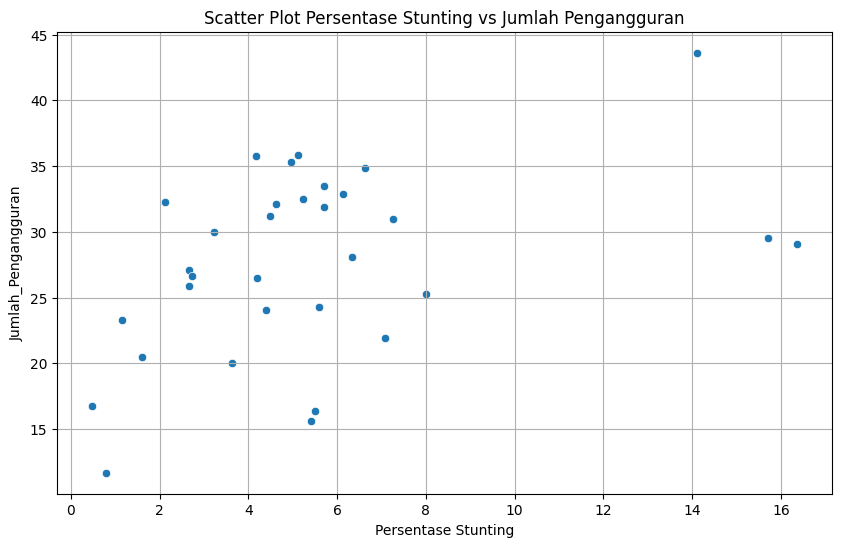

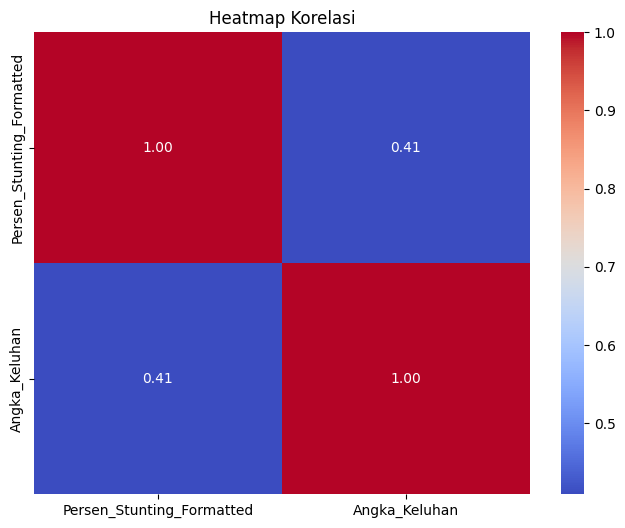

In [ ]:
korelasi = data['Persen_Stunting_Formatted'].corr(data['Angka_Keluhan'])
print(f'Koefisien Korelasi: {korelasi}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Persen_Stunting_Formatted', y='Angka_Keluhan', data=data)
plt.title('Scatter Plot Persentase Stunting vs Jumlah Pengangguran')
plt.xlabel('Persentase Stunting')
plt.ylabel('Jumlah_Pengangguran')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
korelasi_matrix = data[['Persen_Stunting_Formatted', 'Angka_Keluhan']].corr()
sns.heatmap(korelasi_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Angka 0.409071358529594 Menunjukkan terdapat korelasi positif meskipun lemah

In [ ]:
dta = {
    'angka_keluhan': data['Angka_Keluhan'],
    'angka_stunting': data['Persen_Stunting_Formatted']
}

In [ ]:
info = pd.DataFrame(dta)

Memisahkan fitur dan target

In [ ]:
X = info[['angka_keluhan']]
y = info['angka_stunting']

Membagi data menjadi set pelatihan dan set pengujian dan Membuat dan melatih model regresi linier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
def prediksi_stunting(angka_keluhan):
    prediksi = model.predict(np.array([[angka_keluhan]]))
    return prediksi[0]
try:
    angka_keluhan = float(input("Masukkan angka keluhan (dalam persen): "))
    hasil = prediksi_stunting(angka_keluhan)
    print(f"Prediksi angka stunting: {hasil:.2f}%")
except ValueError:
    print("Input tidak valid. Harap masukkan angka yang valid.")

Masukkan angka keluhan (dalam persen): 8
Prediksi angka stunting: 0.48%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
